[0.89258163 0.25078571] [[ 0.0024665  -0.01151035]
 [-0.01151035  0.08057244]]


<ErrorbarContainer object of 3 artists>

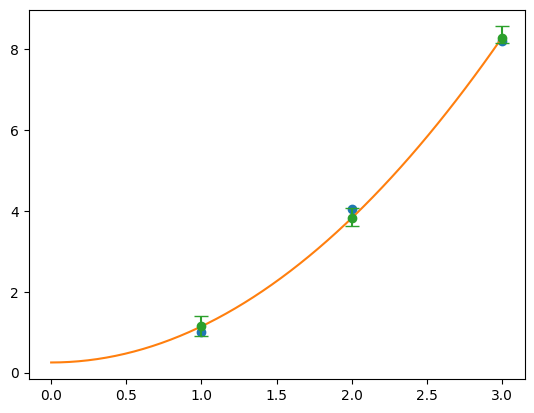

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit



y = [1,4.0505,8.198]
x= [1,2,3]

quatfit = lambda x,a,b: a*x**2 +b
popt, pcov = curve_fit(
    quatfit, x, 
    y
    )
print(popt, pcov)
plt.plot(x, y, 'o')
xlong = np.linspace(0,np.max(x))
plt.plot(xlong, [popt[0]*x**2+popt[1] for x in xlong])
plt.errorbar(x, [popt[0]*x**2+popt[1] for x in x], [[pcov[0][1]*x**2+popt[1] for x in x],[pcov[0][0]*x**2+popt[1] for x in x]], fmt='o', capsize=5)

In [38]:
legend = {5: [4]}
if legend.get(5,[]) == []:
    legend[5] = ["a"+str(5)]
else:
    legend[5] += ["a"+str(5)]
legend[5] += "b"
print(legend)

{5: [4, 'a5', 'b']}


In [25]:
test = [4]
test2 = [1,2,3,4]
print(any(t not in test for t in test2))

True


In [3]:
from itertools import cycle, permutations, product
i=0
model_terms = set()
identity = ["I"]*3
for q1, q2 in [[1,2], [2,1]]:
    for p1, p2 in product("IXYZ", repeat=2):
        i+=1                
        pauli = identity.copy()
        pauli[q1] = p1
        pauli[q2] = p2
        model_terms.add("".join(reversed(pauli)))
print(i, len(model_terms))

32 16


In [20]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.providers.fake_provider import FakeSingaporeV2
import time
tim = time.localtime()
print("%s.%s. %s:%s" % (tim.tm_wday, tim.tm_mon, tim.tm_hour, tim.tm_min))

2.8. 15:36


: 

In [11]:
qubits = [6,7,12,13]
expectations = []
for q in qubits:
    expect = "I"*20
    expect = expect[:q] + 'Z' + expect[q+1:]
    expectations.append(expect)
print(expectations)

Z
Z
Z
Z
['IIIIIIZIIIIIIIIIIIII', 'IIIIIIIZIIIIIIIIIIII', 'IIIIIIIIIIIIZIIIIIII', 'IIIIIIIIIIIIIZIIIIII']


In [51]:
def print_log_file(file_path):
    try:
        with open(file_path, 'r') as file:
            for line in file:
                print(line, end='')
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
    #empty_log()
print_log_file("/home/fabrice/Dokumente/Masterarbeit/AutomatedPERTools/tutorial_notebooks/pauli_lindblad_per/experiment.log")
#print_log_file("tutorial_notebooks\\pauli_lindblad_per\\experiment.log")

2024-08-05 17:03:39,910 The following Qubits were determinded unused
2024-08-05 17:03:39,910 [0, 1, 2]
2024-08-05 17:03:39,910 Generated layer profile with 1 layers:
2024-08-05 17:03:39,910 ["('cx', (Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)))"]
2024-08-05 17:03:39,911 Created pauli bases
2024-08-05 17:03:39,911 ['XXIII', 'YXIII', 'ZXIII', 'XYIII', 'YYIII', 'ZYIII', 'XZIII', 'YZIII', 'ZZIII']
2024-08-05 17:03:39,912 Created model with the 15 following terms:
2024-08-05 17:03:39,912 {'YZIII', 'XZIII', 'IXIII', 'ZYIII', 'ZXIII', 'YXIII', 'YYIII', 'XIIII', 'IZIII', 'ZIIII', 'ZZIII', 'XXIII', 'IYIII', 'YIIII', 'XYIII'}
2024-08-05 17:03:39,921 {YZIII: YIIII, XZIII: XZIII, IXIII: XXIII, ZYIII: YXIII, ZXIII: YYIII, YXIII: ZYIII, YYIII: ZXIII, XIIII: XIIII, IZIII: IZIII, ZIIII: ZZIII, ZZIII: ZIIII, XXIII: IXIII, IYIII: XYIII, YIIII: YZIII, XYIII: IYIII}
2024-08-05 17:03:40,190 Chose single bases:
2024-08-05 17:03:40,190 ['IXIII', 'YYIII', 'ZYIII', 'YIIII', 'IYIII', '

In [45]:
#Qiskit imports
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Pauli, pauli_basis, SuperOp, PTM, Operator
from qiskit.providers.aer.noise import NoiseModel, pauli_error
from qiskit.providers.fake_provider import FakeVigoV2
from qiskit.providers.aer import Aer, AerSimulator
from random import random

#python imports
from random import choice, choices
from itertools import product, permutations, cycle
from scipy.optimize import curve_fit, nnls
from matplotlib import pyplot as plt
import numpy as np

plt.style.use("ggplot")

def sprod(a,b): #simplecting inner product between two Pauli operators
    return int(not a.commutes(b))

test = [Pauli("I"), Pauli("X"), Pauli("Y"), Pauli("Z")]
for a in test:
    for b in test:
        print(sprod(a,b), end="")
    print()
for i in iter("IXYZ"):
    for j in iter("IXYZ"):
        print(sprod(Pauli(i+j), Pauli("IX")), end=" "+i+j+"\n")
        

0000
0011
0101
0110
0 II
0 IX
1 IY
1 IZ
0 XI
0 XX
1 XY
1 XZ
0 YI
0 YX
1 YY
1 YZ
0 ZI
0 ZX
1 ZY
1 ZZ


In [26]:
#Szenario 100 Qubit rechner 10 qubit circuit
#Lineare Anordnung (Linear Array): Qubits sind in einer Reihe angeordnet, wobei jedes Qubit mit seinen Nachbarn verbunden ist. Dieses Layout wird oft für One-Dimensional-Quantencomputer verwendet1.
print("Lineare Anordnung")
print(90*12)

#2D-Gitter (Grid): Ein regelmäßiges Raster, bei dem Qubits in einer 2D-Matrix angeordnet sind. Jedes Qubit ist mit seinen horizontalen und vertikalen Nachbarn verbunden1.
print("Grid")
print(9*(10*3+19*9))

#Ringanordnung: Qubits sind in einem geschlossenen Ring angeordnet, wobei jedes Qubit mit seinen Nachbarn verbunden ist. Dieses Layout kann für bestimmte Algorithmen von Vorteil sein1.
print("Ringanordnung")
print(90*12+9)

#Pyramidenstruktur: Eine dreidimensionale Anordnung von Qubits, die an den Kanten einer Pyramide sitzen. Dieses Layout ermöglicht eine effiziente Kommunikation zwischen Qubits2.
print("Dreieck mit 105 qubits")
print(95*3-9*9+sum([i*3*9 for i in range(15)]))#14+13+12+11+10+9+8+7+6+5+4+3+2+1)

#Hexagonales Gitter: Qubits sind in einem hexagonalen Muster angeordnet, wodurch eine effiziente Kommunikation zwischen benachbarten Qubits ermöglicht wird1.
print("Hex")
print(90*3+120*9)
#10*3+11*9

#Baumstruktur (Tree): Hierbei sind Qubits hierarchisch in einem Baum angeordnet, wobei jeder Knoten mit seinen Kindern verbunden ist. Dieses Layout kann die Kommunikation zwischen Qubits optimieren1.

#Chimäre-Gitter: Ein spezielles 2D-Gitter, das in Quantenprozessoren wie dem D-Wave-System verwendet wird. Es besteht aus kleinen Untereinheiten, die als Chimären bezeichnet werden1.

#Star-Topologie: Ein Qubit in der Mitte ist mit mehreren äußeren Qubits verbunden. Dieses Layout kann die Kommunikation zwischen Qubits verbessern1.

#Cluster-Topologie: Qubits sind in Gruppen (Cluster) angeordnet, wobei jedes Cluster mit anderen Clustern verbunden ist. Dieses Layout kann Fehlerkorrekturen erleichtern1.

#Randomisierte Anordnung: In einigen Quantencomputern werden Qubits zufällig angeordnet, um bestimmte Effekte zu nutzen oder Fehler zu minimieren1.

Lineare Anordnung
1080
Grid
1809
Ringanordnung
1089
Dreieck mit 105 qubits
3039
Hex
1350


Szenario 100 Qubit rechner 10 qubit circuit
Lineare Anordnung (Linear Array): Qubits sind in einer Reihe angeordnet, wobei jedes Qubit mit seinen Nachbarn verbunden ist. Dieses Layout wird oft für One-Dimensional-Quantencomputer verwendet1.
90\*12=1080

2D-Gitter (Grid): Ein regelmäßiges Raster, bei dem Qubits in einer 2D-Matrix angeordnet sind. Jedes Qubit ist mit seinen horizontalen und vertikalen Nachbarn verbunden1.
9*(10\*3+19\*9)=2110-211

Ringanordnung: Qubits sind in einem geschlossenen Ring angeordnet, wobei jedes Qubit mit seinen Nachbarn verbunden ist. Dieses Layout kann für bestimmte Algorithmen von Vorteil sein1.


Pyramidenstruktur: Eine dreidimensionale Anordnung von Qubits, die an den Kanten einer Pyramide sitzen. Dieses Layout ermöglicht eine effiziente Kommunikation zwischen Qubits2.

Baumstruktur (Tree): Hierbei sind Qubits hierarchisch in einem Baum angeordnet, wobei jeder Knoten mit seinen Kindern verbunden ist. Dieses Layout kann die Kommunikation zwischen Qubits optimieren1.

Chimäre-Gitter: Ein spezielles 2D-Gitter, das in Quantenprozessoren wie dem D-Wave-System verwendet wird. Es besteht aus kleinen Untereinheiten, die als Chimären bezeichnet werden1.

Hexagonales Gitter: Qubits sind in einem hexagonalen Muster angeordnet, wodurch eine effiziente Kommunikation zwischen benachbarten Qubits ermöglicht wird1.

Star-Topologie: Ein Qubit in der Mitte ist mit mehreren äußeren Qubits verbunden. Dieses Layout kann die Kommunikation zwischen Qubits verbessern1.

Cluster-Topologie: Qubits sind in Gruppen (Cluster) angeordnet, wobei jedes Cluster mit anderen Clustern verbunden ist. Dieses Layout kann Fehlerkorrekturen erleichtern1.

Randomisierte Anordnung: In einigen Quantencomputern werden Qubits zufällig angeordnet, um bestimmte Effekte zu nutzen oder Fehler zu minimieren1.

### Determination of measurement bases
Find the 9 Bases in which we need to measure

### Generate the Sparse Model
For 2 qubits: Fill in the Pauli I's.
For more then 3: ???

.evolve(layer) applies the layer to the pauli and gives back the result
nophase just removes a - and i

### Generate circuit instances for learning
Set prep Basis

repeat:
- Twirl
- cnot gate

Twirl end

Use meas Basis

### Get expectation value from single instance
Just calculates the expectation value $\in$ [1,-1]

### Test Noise model here:
Make it so a Random Pauli gate is performed after every "cx" or "cz" gate, and make it so that the "II" gate has the, by far, highest chance

'real_errors' saves the diagonal elements of the transfere matrix, as those are the only ones left after twirling.

## Example tomography procedure
### Collect data
- Generate Circut at different depths
- Simulate the circut 'samples' times
- Get average over all samples
- fit the resulte to the depths with the assumtion that overall fidelity is = (fa^+*fa)^n
- take answere at n=2 and have fa^+\*fa = sqrt((fa^+\*fa)^n)


## Full Procedure
- Degeneracy: Sometimes we have G and G^+ in the same pool. We don't need both
- Why the compose here
- Pairs are used for single basis because they can not be combined with anything else. Everything else can be made with deductions between the measurements but not these as they are their own conjugate. So we need to measure the f's seperatly!